In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

2024-07-29 18:47:38.196981: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 18:47:38.197096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 18:47:38.314227: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv("/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv", index_col="date", parse_dates=True)
print(df.head())
df_test = pd.read_csv("/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv", index_col="date", parse_dates=True)
print(df_test.head())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [3]:
print(df.shape)
print(df_test.shape)

(1462, 4)
(114, 4)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'date')

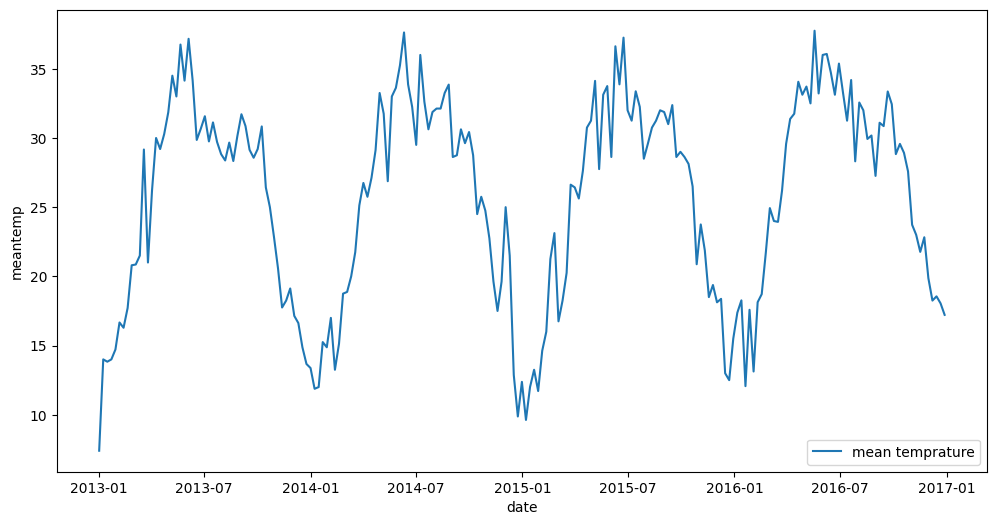

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df["meantemp"][1::7], label="mean temprature")
plt.xlabel("date")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'date')

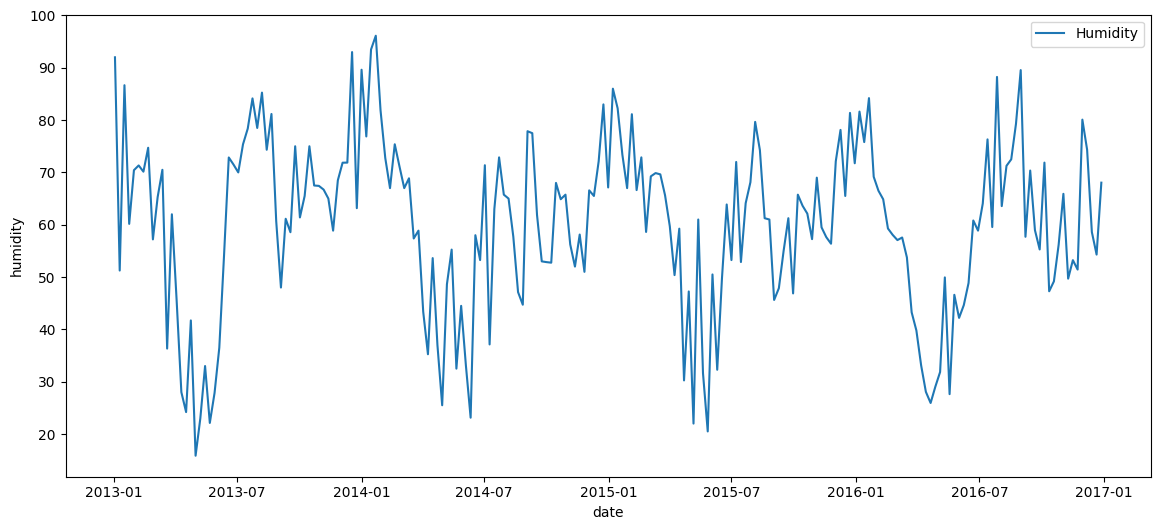

In [5]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df["humidity"][1::7], label="Humidity")
plt.xlabel("date")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'date')

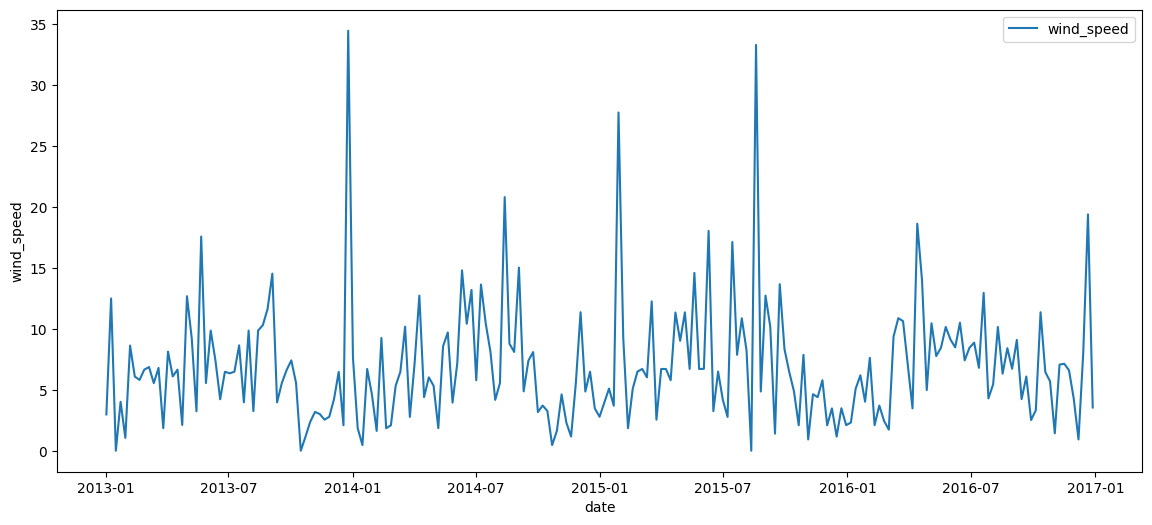

In [6]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df["wind_speed"][1::7], label="wind_speed")
plt.xlabel("date")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'date')

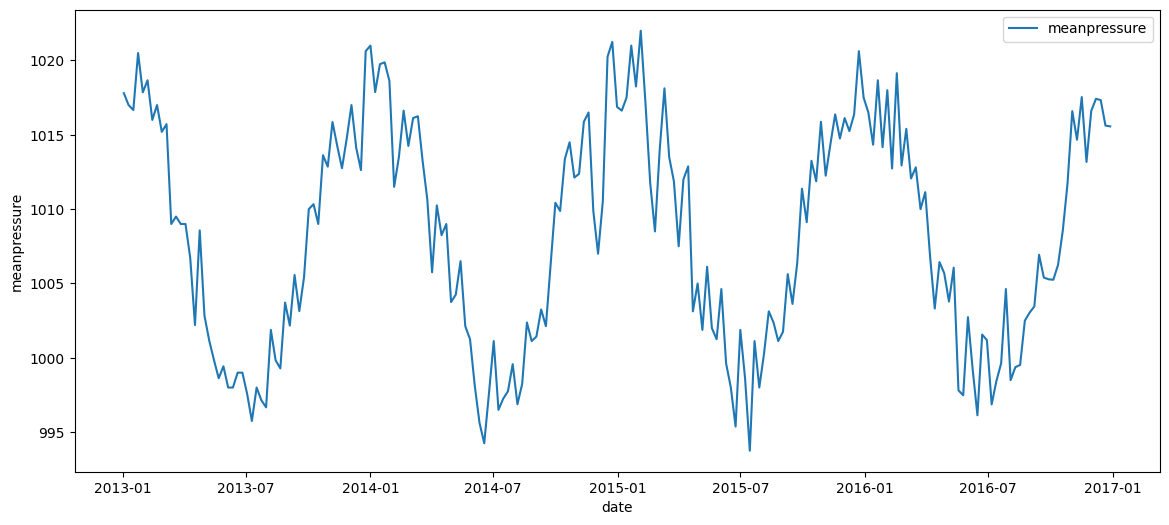

In [7]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df["meanpressure"][1::7], label="meanpressure")
plt.xlabel("date")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'date')

<Figure size 1400x600 with 0 Axes>

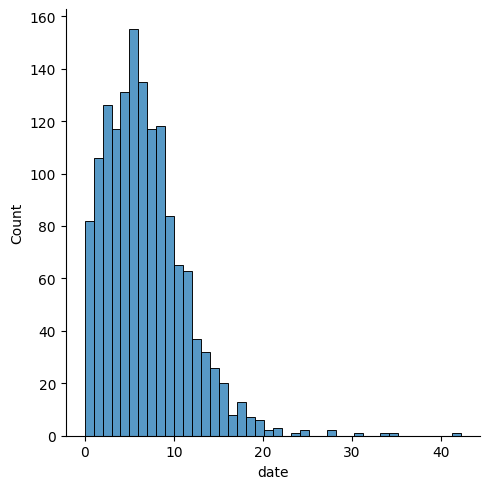

In [8]:
plt.figure(figsize=(14, 6))
sns.displot(data=df["wind_speed"], label="wind_speed")
plt.xlabel("date")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'date')

<Figure size 1400x600 with 0 Axes>

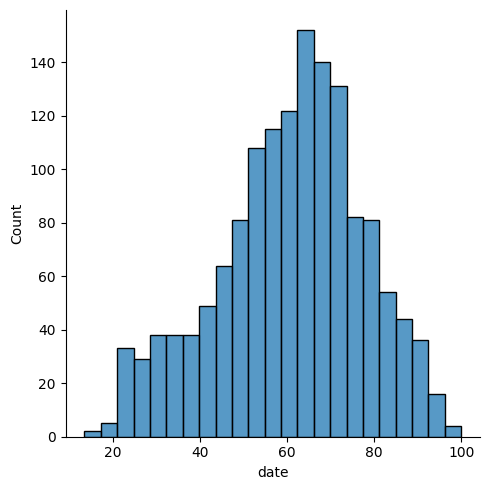

In [9]:
plt.figure(figsize=(14, 6))
sns.displot(data=df["humidity"], label="humidity")
plt.xlabel("date")

### it seems to has ***normal distribution***

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'date')

<Figure size 1400x600 with 0 Axes>

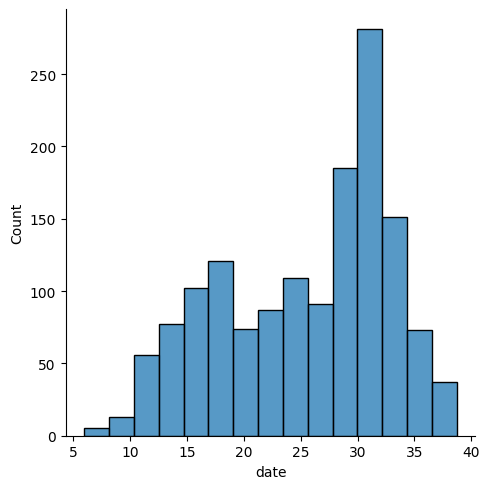

In [11]:
plt.figure(figsize=(14, 6))
sns.displot(data=df["meantemp"], label="mean temprature")
plt.xlabel("date")

In [12]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, PowerTransformer
from scipy import stats

In [13]:
mn = MinMaxScaler()
tr = MinMaxScaler()

In [14]:
df[['wind_speed', 'humidity', 'meantemp']] = mn.fit_transform(df[['wind_speed', 'humidity', 'meantemp']])
df['meanpressure'] = tr.fit_transform(df[['meanpressure']])

df_test[['wind_speed', 'humidity', 'meantemp']] = mn.transform(df_test[['wind_speed', 'humidity', 'meantemp']])
df_test['meanpressure'] = tr.transform(df_test[['meanpressure']])

In [15]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,0.122271,0.820957,0.000000,0.132603
2013-01-02,0.042795,0.907591,0.070583,0.132881
2013-01-03,0.035662,0.849835,0.109743,0.132994
2013-01-04,0.081514,0.668867,0.029212,0.132799
2013-01-05,0.000000,0.847910,0.087636,0.132712
...,...,...,...,...
2016-12-28,0.342890,0.630865,0.084032,0.132590
2016-12-29,0.282387,0.859736,0.142113,0.132764
2016-12-30,0.247453,0.880638,0.148429,0.132895


In [16]:
def create_dataset(X, y, time_steps=1):  
    Xs, ys = [], []   
    for i in range(len(X) - time_steps):   
        v = X[i:(i + time_steps)]
        Xs.append(v)      
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [17]:
sequence_length = 3
X_train, y_train = create_dataset(df, df['meanpressure'], sequence_length)
X_test, y_test = create_dataset(df_test, df_test['meanpressure'], sequence_length)

/tmp/ipykernel_34/1939558631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


In [18]:
valid= 111
X_valid = X_train[-111:]
y_valid = y_train[-111:]
X_train = X_train[:-111]
y_train = y_train[:-111]

In [19]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(1348, 3, 4)
(111, 3, 4)
(111, 3, 4)
(1348,)
(111,)
(111,)


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Bidirectional
from keras.layers import LSTM
from tensorflow.keras.optimizers import SGD

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(Bidirectional(LSTM(units=128, activation='tanh'
                                  ,input_shape=(sequence_length, X_train.shape[2]), return_sequences=True)))
lstm_model.add(Bidirectional(LSTM(units=64, activation='sigmoid', return_sequences=False)))


lstm_model.add(Dense(units=64, activation='relu'))
lstm_model.add(Dense(units=32, activation='relu'))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer= SGD(learning_rate=1.7e-4), loss='mse')

history = lstm_model.fit(X_train, y_train, epochs=200, batch_size=10, validation_data=(X_valid, y_valid))

Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.1813 - val_loss: 0.0699
Epoch 2/200
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0538 - val_loss: 0.0227
Epoch 3/200
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0214 - val_loss: 0.0120
Epoch 4/200
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0103 - val_loss: 0.0066
Epoch 5/200
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0077 - val_loss: 0.0041
Epoch 6/200
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 7/200
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 8/200
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 9/200
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018 - val_loss: 8.2570e-04
Epoch 10/200
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.9098e-04 - val_loss: 6.1159e-04
Epoch 11/200
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.5492e-04 - val_loss: 4.6854e-04
Epoch 12/200
135/135 ━

In [21]:
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 3, 256)         │       136,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,915 (1.19 MB)

 Trainable params: 310,913 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

<Axes: >

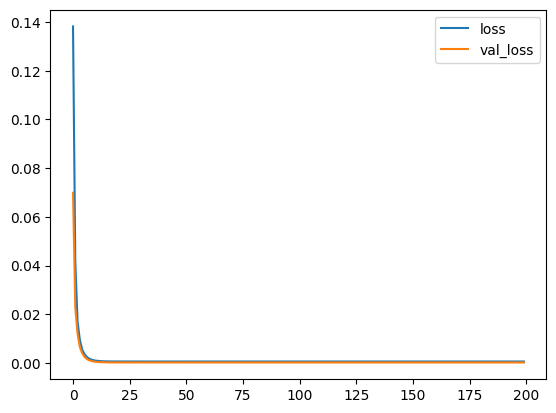

In [22]:
loss_df = pd.DataFrame(lstm_model.history.history)
loss_df.plot()

In [23]:
lstm_pred = lstm_model.predict(X_test)
lstm_pred = tr.inverse_transform(lstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = tr.inverse_transform(y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


RMSE: 4.673212600078571
R2 Score: 0.32298178422112345


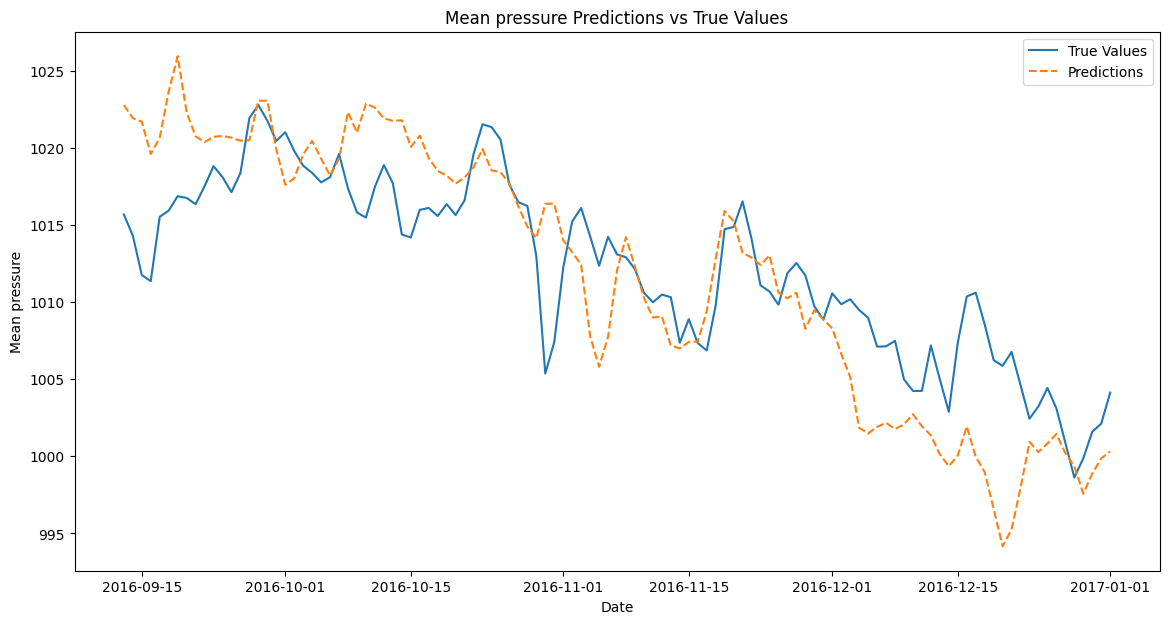

In [24]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import math

# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
r2 = r2_score(y_test, lstm_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], lstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean pressure')
plt.title('Mean pressure Predictions vs True Values')
plt.legend()
plt.show()